In [1]:
import numpy as np
np.__version__

'1.10.0'

In [2]:
import dask
dask.__version__

'0.7.3'

In [3]:
import pandas as pd
pd.__version__

'0.17.0'

In [4]:
import dask.dataframe as dd

### dask.dataframe

In [5]:
pd.options.display.max_columns = 8
pd.options.display.max_rows = 8

In [6]:
df = pd.DataFrame({'X': np.arange(10), 
                   'Y': np.arange(10, 20),
                   'Z': np.arange(20, 30)},
                  index=list('abcdefghij'))
df

,X,Y,Z
a,0,10,20
b,1,11,21
c,2,12,22
d,3,13,23
...,...,...,...
g,6,16,26
h,7,17,27
i,8,18,28
j,9,19,29


In [7]:
ddf = dd.from_pandas(df, 2)
ddf

dd.DataFrame<from_pandas-bf1023a3667853dba9d52d627d723d2a, divisions=('a', 'f', 'j')>

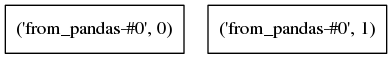

In [8]:
ddf.visualize()

In [9]:
(ddf + 1)

dd.DataFrame<elemwise-5bb68c65f90a7daa2789f19af6634f6b, divisions=('a', 'f', 'j')>

In [10]:
(ddf + 1).compute()

,X,Y,Z
a,1,11,21
b,2,12,22
c,3,13,23
d,4,14,24
...,...,...,...
g,7,17,27
h,8,18,28
i,9,19,29
j,10,20,30


In [11]:
ddf.sum().compute().to_frame()

,0
X,45
Y,145
Z,245


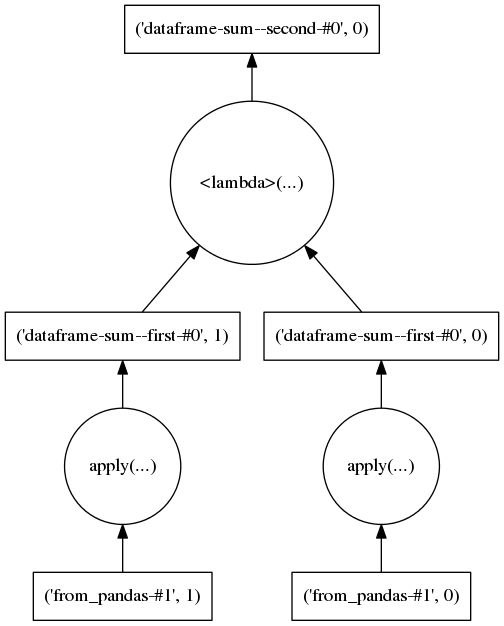

In [12]:
ddf.sum().visualize()

In [13]:
ddf.mean().compute()

X     4.5
Y    14.5
Z    24.5
dtype: float64

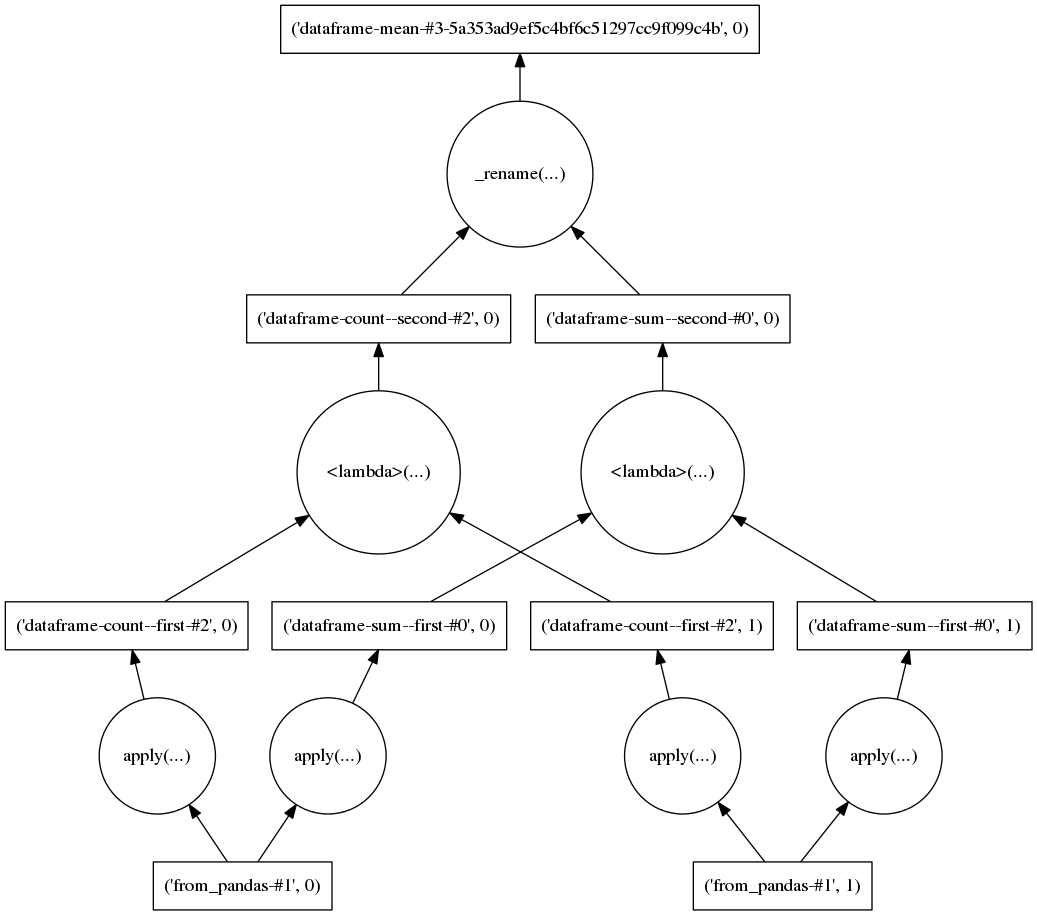

In [14]:
ddf.mean().visualize()

In [15]:
ddf.describe().compute()

,X,Y,Z
count,10.00000,10.00000,10.00000
mean,4.50000,14.50000,24.50000
std,3.02765,3.02765,3.02765
min,0.00000,10.00000,20.00000
25%,2.00000,12.00000,22.00000
50%,6.00000,16.00000,26.00000
75%,8.00000,18.00000,28.00000
max,9.00000,19.00000,29.00000


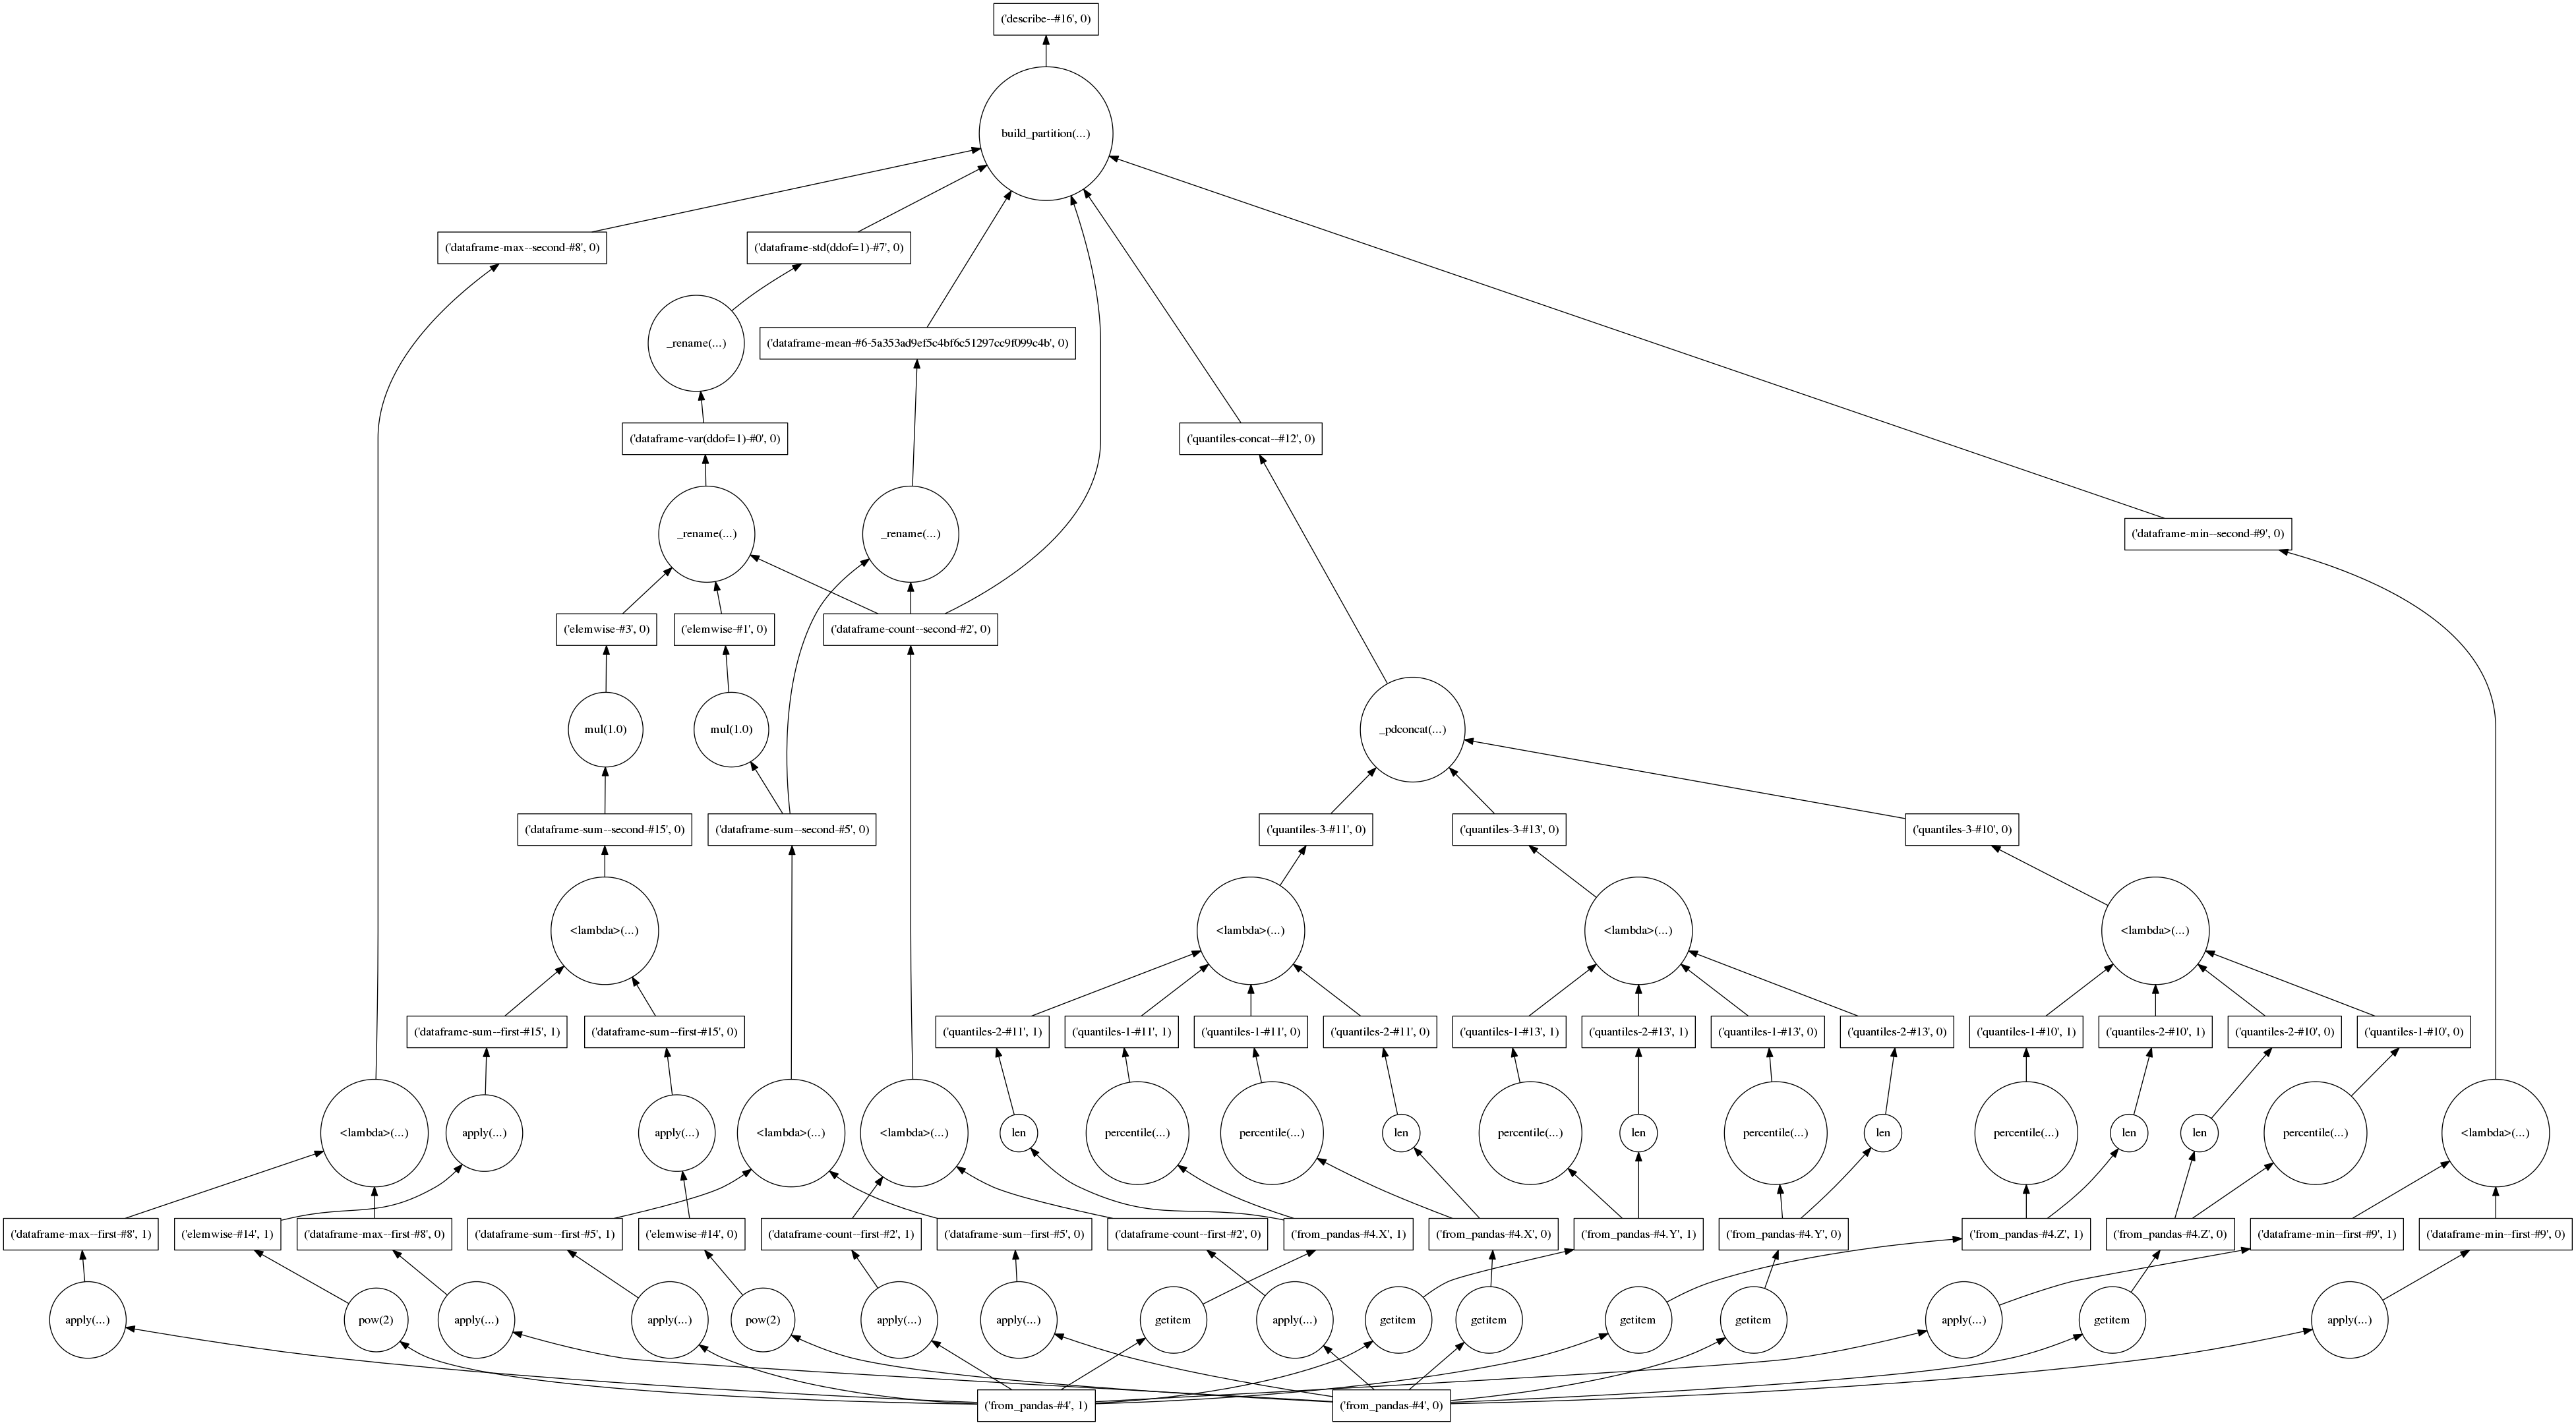

In [16]:
ddf.describe().visualize()

In [17]:
n = 100000000
df = pd.DataFrame({'a': np.random.randint(1, 100, n),
                   'b': np.random.randn(n)})
df

,a,b
0,2,-0.880292
1,28,-0.873556
2,88,-0.823065
3,94,-0.234198
...,...,...
99999996,93,0.971337
99999997,34,0.682041
99999998,63,0.633029
99999999,83,0.832510


In [18]:
ddf = dd.from_pandas(df, 5)
ddf

dd.DataFrame<from_pandas-6cbc09a9c2ded19790d61b9cf9449a10, divisions=(0, 20000000, 40000000, 60000000, 80000000, 99999999)>

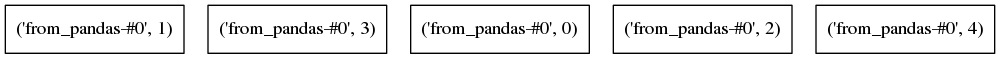

In [19]:
ddf.visualize()

In [20]:
df.describe()

,a,b
count,100000000.000000,100000000.000000
mean,50.000657,-0.000091
std,28.577201,1.000128
min,1.000000,-6.032026
25%,25.000000,-0.674655
50%,50.000000,-0.000147
75%,75.000000,0.674349
max,99.000000,5.664796


In [21]:
%timeit df.describe()

1 loops, best of 3: 25.3 s per loop


In [22]:
%timeit ddf.describe().compute()

1 loops, best of 3: 3.87 s per loop


In [23]:
ddf.describe().compute()

,a,b
count,100000000.000000,100000000.000000
mean,50.000657,-0.000091
std,28.577201,1.000128
min,1.000000,-6.032026
25%,25.000000,-0.674211
50%,50.000000,0.000223
75%,75.000000,0.674980
max,99.000000,5.664796


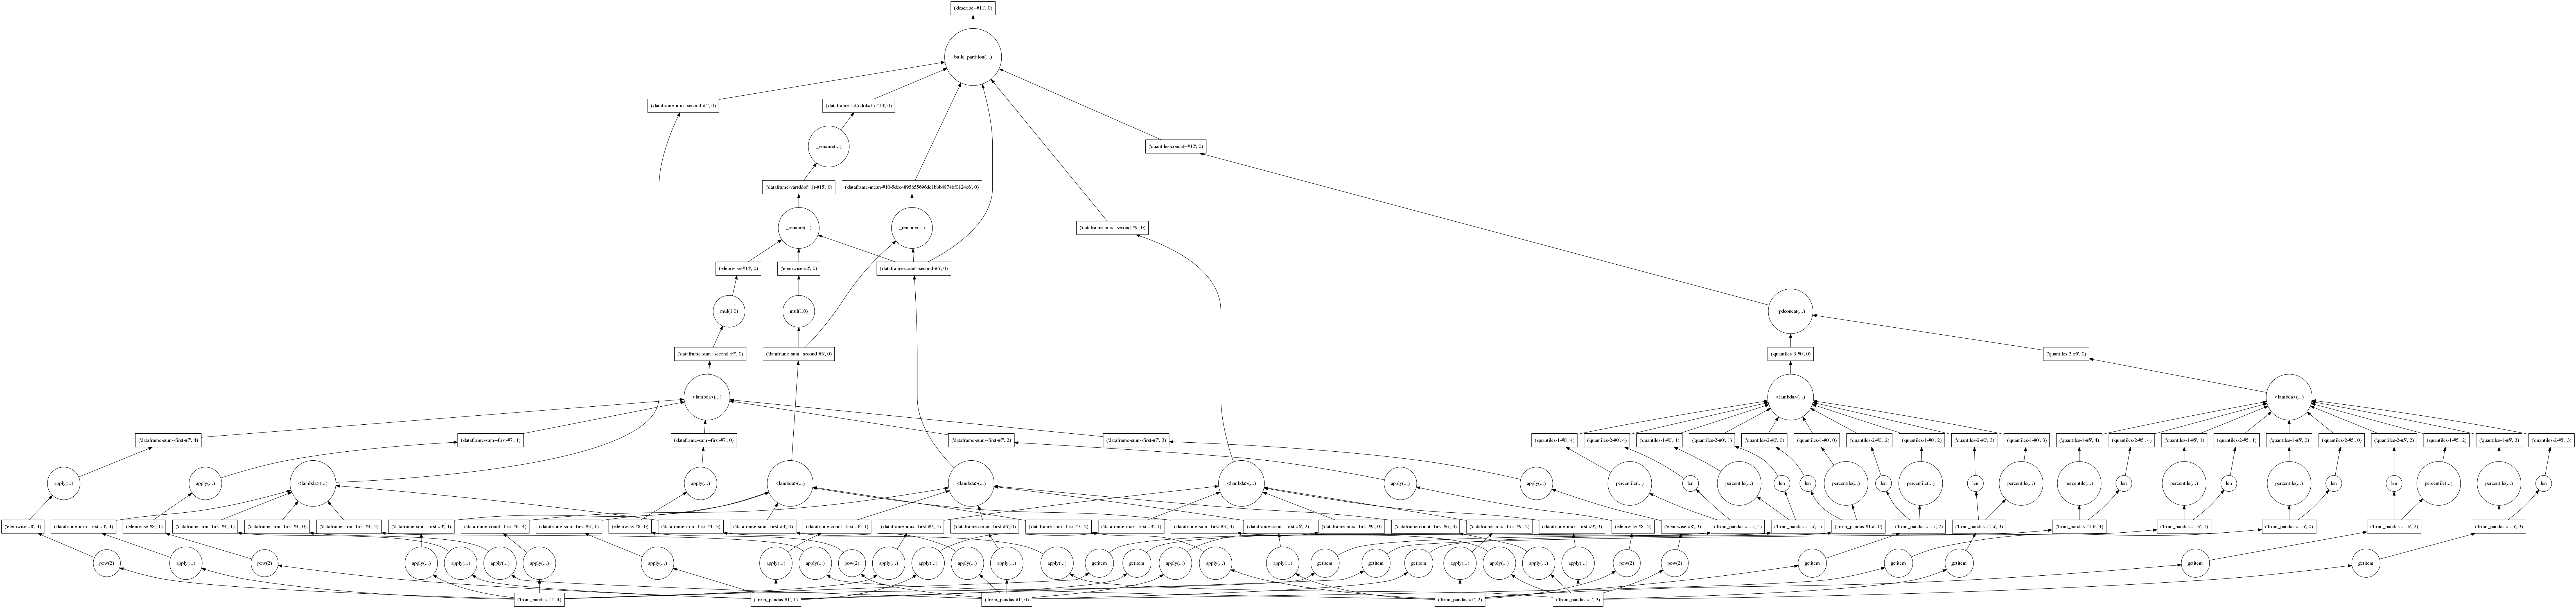

In [24]:
ddf.describe().visualize()